In [5]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def connect():
  connection = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "wp-ecommerce"
  )

  cursor = connection.cursor(dictionary = True)

  return connection, cursor

In [35]:
def get_customers_by_country():
  _, cursor = connect()

  sql = '''
    SELECT country, count(*) as count_by_country
    FROM `wp_wc_customer_lookup`
    GROUP BY country
  '''

  cursor.execute(sql)

  results = cursor.fetchall()

  entries = []

  for row in results:
    entries.append({
      "country": row["country"],
      "count_by_country": row["count_by_country"]
    })
  
  data = pd.DataFrame(entries)

  return data

In [36]:
data = get_customers_by_country()

data

,country,count_by_country
0,AE,209
1,BH,218
2,JO,187
3,KW,188
4,SA,179


In [39]:
def show_customers_by_country_bars():
  x = data["country"]
  y = data["count_by_country"]

  plt.title("Customers count by country")
  plt.xlabel("Country")
  plt.ylabel("Count")

  colors = []

  for i in range(len(x)):
    colors.append([np.random.rand(), np.random.rand(), np.random.rand()])
    plt.text(x = i, y = y[i], s = y[i])

  plt.bar(x, y, color = colors)
  plt.show()

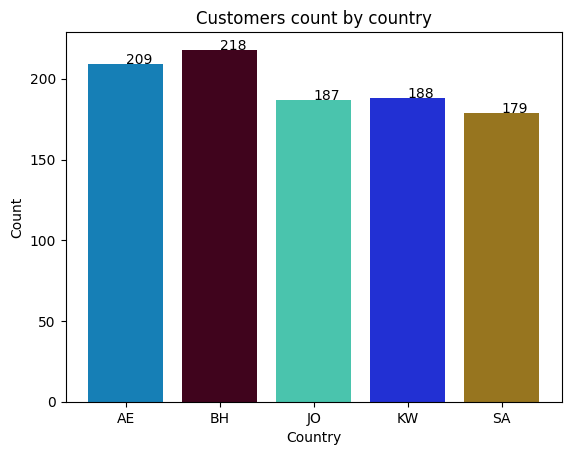

In [46]:
show_customers_by_country_bars()

In [47]:
def show_customers_by_country_pie():
  count = data["count_by_country"]
  labels = data["country"]

  plt.title("Customers count by country")
  plt.pie(count, labels = labels, autopct = "%1.1f%%")
  plt.show()

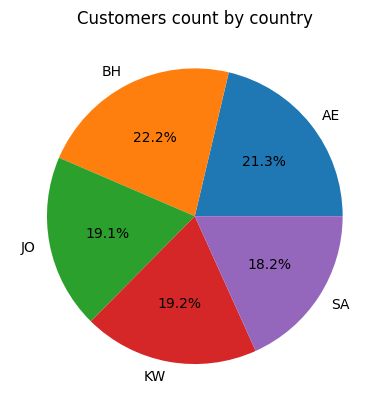

In [49]:
show_customers_by_country_pie()